In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#ETL FOR ALTERNATIVE DATA SOURCE, IGNORE THIS ONE!
# books_df= pd.read_csv("books.csv", on_bad_lines='skip')
# books_df.head()

In [3]:
#ETL FOR BX-Books, change position A1 to 'ISBN' in the CSV in Excel!
#I had to change the encoding because the CSV would not read in with UTF-08.
BX_1= pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Books.csv", on_bad_lines='skip', encoding='latin-1' )
BX_1.head()

/var/folders/xn/zxr8x63d7dl9t22nbdnj_b2c0000gn/T/ipykernel_76421/2050309160.py:3: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  BX_1= pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Books.csv", on_bad_lines='skip', encoding='latin-1' )


,ISBN,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,"0195153448;""Classical Mythology"";""Mark P. O. M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"0002005018;""Clara Callan"";""Richard Bruce Wrigh...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"0060973129;""Decision in Normandy"";""Carlo D'Est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"0374157065;""Flu: The Story of the Great Influe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"0393045218;""The Mummies of Urumchi"";""E. J. W. ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Splitting the ISBN column based on the semi-colon
BX_1_split= BX_1['ISBN'].str.split(';')
BX_1_split.head()

0    [0195153448, "Classical Mythology", "Mark P. O...
1    [0002005018, "Clara Callan", "Richard Bruce Wr...
2    [0060973129, "Decision in Normandy", "Carlo D'...
3    [0374157065, "Flu: The Story of the Great Infl...
4    [0393045218, "The Mummies of Urumchi", "E. J. ...
Name: ISBN, dtype: object

In [5]:
#Turning this split into a dataframe
BX_1_df= pd.DataFrame(BX_1_split.tolist()).add_prefix('Book_')
BX_1_df.head()

,Book_0,Book_1,Book_2,Book_3,Book_4,Book_5,Book_6,Book_7,Book_8,Book_9,Book_10,Book_11,Book_12,Book_13
0,0195153448,"""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press""","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....",None,None,None,None,None,None
1,0002005018,"""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada""","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....",None,None,None,None,None,None
2,0060973129,"""Decision in Normandy""","""Carlo D'Este""","""1991""","""HarperPerennial""","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129....",None,None,None,None,None,None
3,0374157065,"""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999""","""Farrar Straus Giroux""","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065....",None,None,None,None,None,None
4,0393045218,"""The Mummies of Urumchi""","""E. J. W. Barber""","""1999""","""W. W. Norton &amp","Company""","""http://images.amazon.com/images/P/0393045218....","""http://images.amazon.com/images/P/0393045218....","""http://images.amazon.com/images/P/0393045218....",None,None,None,None,None


In [6]:
#Removing the unnecessary columns
BX_1_drop= BX_1_df.drop(columns=['Book_5','Book_6', 'Book_7','Book_8','Book_9', 
                                      'Book_10', 'Book_11', 'Book_12', 'Book_13'])
BX_1_drop.head()

,Book_0,Book_1,Book_2,Book_3,Book_4
0,0195153448,"""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press"""
1,0002005018,"""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada"""
2,0060973129,"""Decision in Normandy""","""Carlo D'Este""","""1991""","""HarperPerennial"""
3,0374157065,"""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999""","""Farrar Straus Giroux"""
4,0393045218,"""The Mummies of Urumchi""","""E. J. W. Barber""","""1999""","""W. W. Norton &amp"


In [7]:
#Renaming the columns. This is the final step for BX-Books.csv
BX_1 = BX_1_drop.rename(columns={'Book_0': 'ISBN', 'Book_1': 'Title', 'Book_2': 'Author', 
                                        'Book_3': 'Year', 'Book_4': 'Publisher'})
BX_1.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,"""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press"""
1,0002005018,"""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada"""
2,0060973129,"""Decision in Normandy""","""Carlo D'Este""","""1991""","""HarperPerennial"""
3,0374157065,"""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999""","""Farrar Straus Giroux"""
4,0393045218,"""The Mummies of Urumchi""","""E. J. W. Barber""","""1999""","""W. W. Norton &amp"


In [8]:
#Reading in the BX-Books-Ratings.csv. Change position A1 to Book-Rating in Excel to make this easy!
BX_ratings= pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Book-Ratings.csv",
                        on_bad_lines='skip', encoding='latin-1')
BX_ratings.head()

/var/folders/xn/zxr8x63d7dl9t22nbdnj_b2c0000gn/T/ipykernel_76421/2970673956.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  BX_ratings= pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Book-Ratings.csv",


,Book-Rating,Unnamed: 1,Unnamed: 2
0,"276725;""034545104X"";""0""",NaN,NaN
1,"276726;""0155061224"";""5""",NaN,NaN
2,"276727;""0446520802"";""0""",NaN,NaN
3,"276729;""052165615X"";""3""",NaN,NaN
4,"276729;""0521795028"";""6""",NaN,NaN


In [9]:
#Splitting the Book-Rating column based on the semi-colon
BX_ratings_split= BX_ratings['Book-Rating'].str.split(';')
BX_ratings_split.head()

0    [276725, "034545104X", "0"]
1    [276726, "0155061224", "5"]
2    [276727, "0446520802", "0"]
3    [276729, "052165615X", "3"]
4    [276729, "0521795028", "6"]
Name: Book-Rating, dtype: object

In [10]:
#Pushing the split to a dataframe
BX_ratings_df= pd.DataFrame(BX_ratings_split.tolist()).add_prefix('Col_')
BX_ratings_df.head()

,Col_0,Col_1,Col_2
0,276725,"""034545104X""","""0"""
1,276726,"""0155061224""","""5"""
2,276727,"""0446520802""","""0"""
3,276729,"""052165615X""","""3"""
4,276729,"""0521795028""","""6"""


In [11]:
#Renaming the columns
BX_ratings= BX_ratings_df.rename(columns={'Col_0': 'User_ID', 'Col_1': 'ISBN_1', 'Col_2': 'Rating'})
BX_ratings.head()

,User_ID,ISBN_1,Rating
0,276725,"""034545104X""","""0"""
1,276726,"""0155061224""","""5"""
2,276727,"""0446520802""","""0"""
3,276729,"""052165615X""","""3"""
4,276729,"""0521795028""","""6"""


In [12]:
#Dropping the apostrophes around ISBN_1 and Rating so it will join with the first CSV 
BX_ratings['ISBN_1']= BX_ratings['ISBN_1'].str.replace(r'"', '')
BX_ratings['Rating']=BX_ratings['Rating'].str.replace(r'"', '')
BX_ratings.head()

,User_ID,ISBN_1,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
#Dropping the null values in the ratings dataframe
BX_ratings.replace('NULL', np.nan, inplace=True)
BX_ratings.dropna(inplace=True)

#Converting the ratings column
BX_ratings['Rating']= BX_ratings['Rating'].astype('int')

BX_ratings.head()

,User_ID,ISBN_1,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
#Reading in the BX-Users
BX_users= pd.read_csv('/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Users.csv', 
                      on_bad_lines='skip', encoding='latin-1')
BX_users= BX_users.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
BX_users.head()

/var/folders/xn/zxr8x63d7dl9t22nbdnj_b2c0000gn/T/ipykernel_76421/688142864.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  BX_users= pd.read_csv('/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Users.csv',


,City,State,Country
0,"1;""nyc",new york,"usa"";NULL"
1,"2;""stockton",california,"usa"";""18"""
2,"3;""moscow",yukon territory,"russia"";NULL"
3,"4;""porto",v.n.gaia,"portugal"";""17"""
4,"5;""farnborough",hants,"united kingdom"";NULL"


In [15]:
#Getting rid of the apostraphes around cities and countries
BX_users['City']= BX_users['City'].str.replace(r'"', '')
BX_users['Country']=BX_users['Country'].str.replace(r'"', '')
BX_users.head()

,City,State,Country
0,1;nyc,new york,usa;NULL
1,2;stockton,california,usa;18
2,3;moscow,yukon territory,russia;NULL
3,4;porto,v.n.gaia,portugal;17
4,5;farnborough,hants,united kingdom;NULL


In [16]:
#Cleaning up the whole Users dataframe
BX_users.isnull().sum()
BX_users_clean= BX_users.dropna()
BX_users_clean.isnull().sum()

City       0
State      0
Country    0
dtype: int64

In [17]:
#Making the state column a dataframe
BX_users_state=pd.DataFrame(BX_users_clean['State'].tolist())
BX_users_state.columns=['State']

#Fixing the index for concatenation 
BX_users_state.reset_index(drop=True)
BX_users_state.head()

,State
0,new york
1,california
2,yukon territory
3,v.n.gaia
4,hants


In [18]:
#Splitting City
BX_users_split= BX_users_clean['City'].str.split(';')
BX_users_split.head()

0            [1, nyc]
1       [2, stockton]
2         [3, moscow]
3          [4, porto]
4    [5, farnborough]
Name: City, dtype: object

In [19]:
#Pushing the city split to a dataframe
BX_users_df= pd.DataFrame(BX_users_split.tolist()).add_prefix('Col_')
BX_users_city=BX_users_df.drop(columns=['Col_0','Col_2','Col_3','Col_4','Col_5','Col_6','Col_7','Col_8','Col_9']).rename(columns={'Col_1':'City'})
BX_users_city.head()

,City
0,nyc
1,stockton
2,moscow
3,porto
4,farnborough


In [20]:
#Splitting Country 
BX_country_split= BX_users_clean['Country'].str.split(';')
BX_country_split.head()

0               [ usa, NULL]
1                 [ usa, 18]
2            [ russia, NULL]
3            [ portugal, 17]
4    [ united kingdom, NULL]
Name: Country, dtype: object

In [21]:
#Pushing the country split to a dataframe and renaming the columns country and age
BX_country_split_df= pd.DataFrame(BX_country_split.tolist()).add_prefix('Col_')
BX_country_split_df= BX_country_split_df.drop(columns=['Col_2','Col_3','Col_4']).rename(columns={'Col_0':'Country', 'Col_1': 'Age'})
BX_country_split_df.head()


,Country,Age
0,usa,NULL
1,usa,18
2,russia,NULL
3,portugal,17
4,united kingdom,NULL


In [22]:
#Concatenated for a complete users dataframe!
BX_users= pd.concat([BX_users_city, BX_users_state, BX_country_split_df], axis=1)

#Removing those pesky null values again
BX_users.replace('NULL', np.nan, inplace=True)
BX_users.dropna(inplace=True)

BX_users.head(20)

,City,State,Country,Age
1,stockton,california,usa,18
3,porto,v.n.gaia,portugal,17
5,santa monica,california,usa,61
9,albacete,wisconsin,spain,26
10,melbourne,victoria,australia,14
12,barcelona,barcelona,spain,26
17,rio de janeiro,rio de janeiro,brazil,25
18,weston,,,14
19,langhorne,pennsylvania,usa,19
20,ferrol / spain,alabama,spain,46


In [23]:
#Getting an overview of the cleaned users dataframe
BX_users.describe()

,City,State,Country,Age
count,168165,168165,168165,168165
unique,24952,4337,310,2714
top,barcelona,california,usa,24
freq,2519,9498,75514,5599


In [24]:
#Joining the ratings csv with the books csv based on matching their ISBNs.
BX_complete= pd.merge(BX_ratings, BX_1, left_on="ISBN_1", right_on="ISBN", how="inner")
BX_complete.head(20)

,User_ID,ISBN_1,Rating,ISBN,Title,Author,Year,Publisher
0,276725,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
1,2313,034545104X,5,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
2,6543,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
3,8680,034545104X,5,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
4,10314,034545104X,9,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
5,23768,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
6,28266,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
7,28523,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
8,39002,034545104X,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
9,50403,034545104X,9,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""


In [25]:
#Getting rid of the ISBN_1 column since it's no longer needed
BX_complete= BX_complete.drop(columns=['ISBN_1'])

In [26]:
#Final clean up! 
BX_complete_clean= BX_complete.dropna()
BX_complete_clean.isnull().sum()
BX_complete_clean.head(10)

,User_ID,Rating,ISBN,Title,Author,Year,Publisher
0,276725,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
1,2313,5,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
2,6543,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
3,8680,5,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
4,10314,9,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
5,23768,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
6,28266,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
7,28523,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
8,39002,0,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""
9,50403,9,034545104X,"""Flesh Tones: A Novel""","""M. J. Rose""","""2002""","""Ballantine Books"""


In [27]:
#Exporting clean data as CSV
from pathlib import Path 
filepath = Path('/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX_final.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
BX_complete_clean.to_csv(filepath)  

In [28]:
#Getting an overview of the final dataset's ratings
BX_complete_clean.describe()

,Rating
count,834178.000000
mean,2.881100
std,3.865598
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,10.000000


In [29]:
#I'd like to create a list of the top 10 titles with the highest average ratings. 
BX=BX_complete_clean
BX_top_ten=BX.groupby('Title')['Rating'].agg(['mean', 'count']).sort_values(by='count',ascending=False)
BX_top_ten= BX_top_ten.reset_index()
BX_top_ten

,Title,mean,count
0,"""Wild Animus""",1.033156,2262
1,"""The Lovely Bones: A Novel""",4.457045,1164
2,"""The Da Vinci Code""",4.669492,826
3,"""A Painted House""",3.199739,766
4,"""The Nanny Diaries: A Novel""",3.459816,759
...,...,...,...
194175,"""Raised Catholic (Can You Tell?)""",0.000000,1
194176,"""Eternally Yours (Arabesque)""",8.000000,1
194177,"""Eternity: Eternity""",0.000000,1
194178,"""Ethan Frome (Classics Library (NTC))""",0.000000,1


In [30]:
# Due to all of the titles with only one rating I'm going to arbitrarily add the condition 
# of having at least 100 ratings as a minimum level of popularity.
BX_top_ten= BX_top_ten.loc[BX_top_ten['count'] > 100].sort_values(by='mean',ascending=False).head(10)
BX_top_ten= BX_top_ten.rename(columns={'mean': 'average_rating', 'count': 'ratings_count'})
BX_top_ten.head(10)

,Title,average_rating,ratings_count
73,"""Harry Potter and the Goblet of Fire (Book 4)""",5.936232,345
58,"""Harry Potter and the Prisoner of Azkaban (Boo...",5.884211,380
154,"""Harry Potter and the Sorcerer's Stone (Book 1)""",5.737705,244
491,"""The Little Prince""",5.610687,131
83,"""Harry Potter and the Order of the Phoenix (Bo...",5.544304,316
186,"""Ender's Game (Ender Wiggins Saga (Paperback))""",5.340708,226
25,"""Harry Potter and the Chamber of Secrets (Book...",5.177645,501
437,"""Ishmael: An Adventure of the Mind and Spirit""",5.055944,143
516,"""Interpreter of Maladies""",4.984252,127
130,"""The Hobbit : The Enchanting Prelude to The Lo...",4.965385,260


Text(0.5, 0, 'Average Rating')

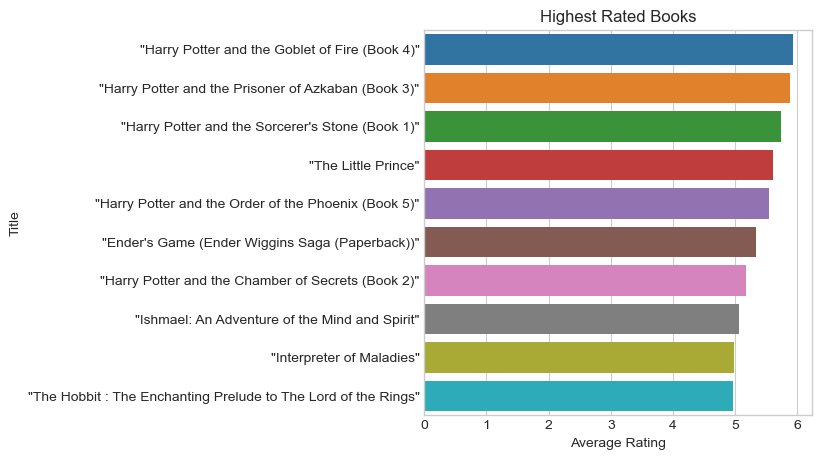

In [31]:
#Building a bar chart displaying the top 10 book titles in the dataset
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="average_rating", y="Title", data=BX_top_ten)
graph.set(title='Highest Rated Books')
graph.set_xlabel("Average Rating")

In [32]:
#Prepping data visualization to see the 10 titles which have been rated the most
Book_rating= BX.groupby('Title')['Rating'].count().reset_index().sort_values(by='Rating', ascending=False).head(10)
Book_rating=Book_rating.rename(columns={'Rating': 'Total_Ratings'}).reset_index()
Book_rating

,index,Title,Total_Ratings
0,189344,"""Wild Animus""",2262
1,157645,"""The Lovely Bones: A Novel""",1164
2,147031,"""The Da Vinci Code""",826
3,4461,"""A Painted House""",766
4,160066,"""The Nanny Diaries: A Novel""",759
5,22806,"""Bridget Jones's Diary""",740
6,166158,"""The Secret Life of Bees""",704
7,43269,"""Divine Secrets of the Ya-Ya Sisterhood: A Novel""",669
8,164381,"""The Red Tent (Bestselling Backlist)""",667
9,12045,"""Angels &amp",636


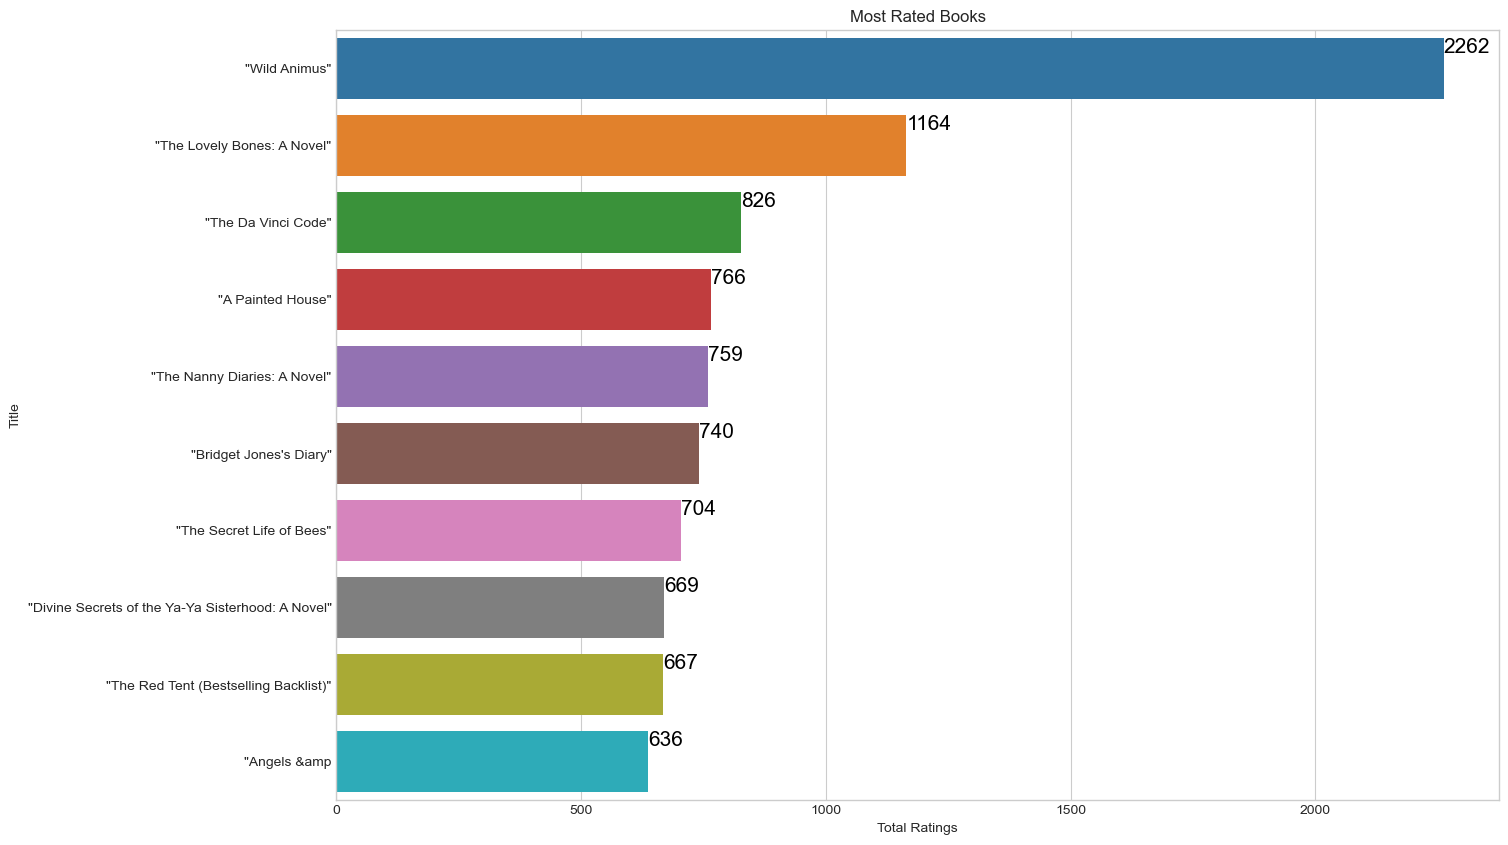

In [33]:
#Building a bar chart showing the 10 books rated the most
plt.figure(figsize=(15,10))
graph = sns.barplot(x= Book_rating['Total_Ratings'],y= Book_rating['Title'], data=Book_rating)
graph.set(title= 'Most Rated Books')
graph.set_xlabel("Total Ratings")

#Figuring out how to do this was rough
totals = []
for i in graph.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in graph.patches:
    graph.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [34]:
#Prepping data visualization for the 10 highest rated authors with at least 100 ratings
Top_authors= BX.groupby('Author')['Rating'].agg(['mean','count']).sort_values(by='mean', ascending=False)
Top_authors= Top_authors.loc[Top_authors['count'] > 100].reset_index().head(10)
Top_authors

,Author,mean,count
0,"""Shel Silverstein""",6.125000,176
1,"""Antoine de Saint-ExupÃ©ry""",5.749004,251
2,"""Bill Watterson""",5.658537,492
3,"""Herge""",5.459459,148
4,"""Bradley Trevor Greive""",5.439024,123
5,"""Dr. Seuss""",5.426056,284
6,"""J. K. Rowling""",5.411513,2571
7,"""Daniel Quinn""",5.193966,232
8,"""Michael Ende""",5.192000,125
9,"""Stephen Chbosky""",5.054545,110


Text(0.5, 0, 'Total Count')

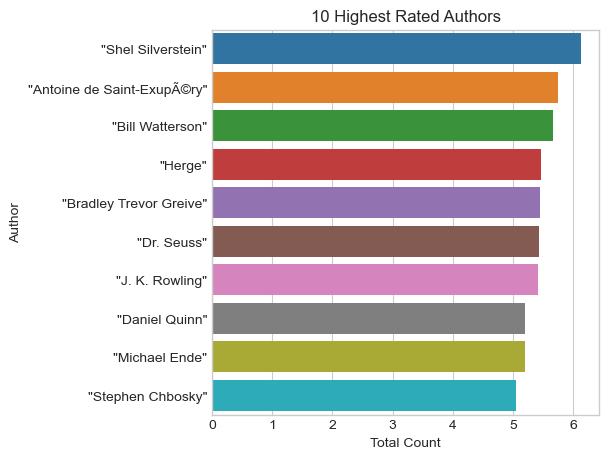

In [35]:
#Building a bar chart displaying the 10 highest rated authors
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="mean", y="Author", data=Top_authors)
graph.set(title='10 Highest Rated Authors')
graph.set_xlabel("Total Count")

In [36]:
#Prepping data visualization for the 10 most popular authors 
Pop_author=BX.groupby('Author')['Title'].count().reset_index().sort_values(by='Title', ascending=False).head(10)
Pop_author

,Author,Title
80262,"""Stephen King""",8135
65131,"""Nora Roberts""",6960
44515,"""John Grisham""",5457
39472,"""James Patterson""",4818
59240,"""Mary Higgins Clark""",4091
21345,"""Dean R. Koontz""",3933
19491,"""Danielle Steel""",3417
84428,"""Tom Clancy""",3297
81129,"""Sue Grafton""",3078
40321,"""Janet Evanovich""",3076


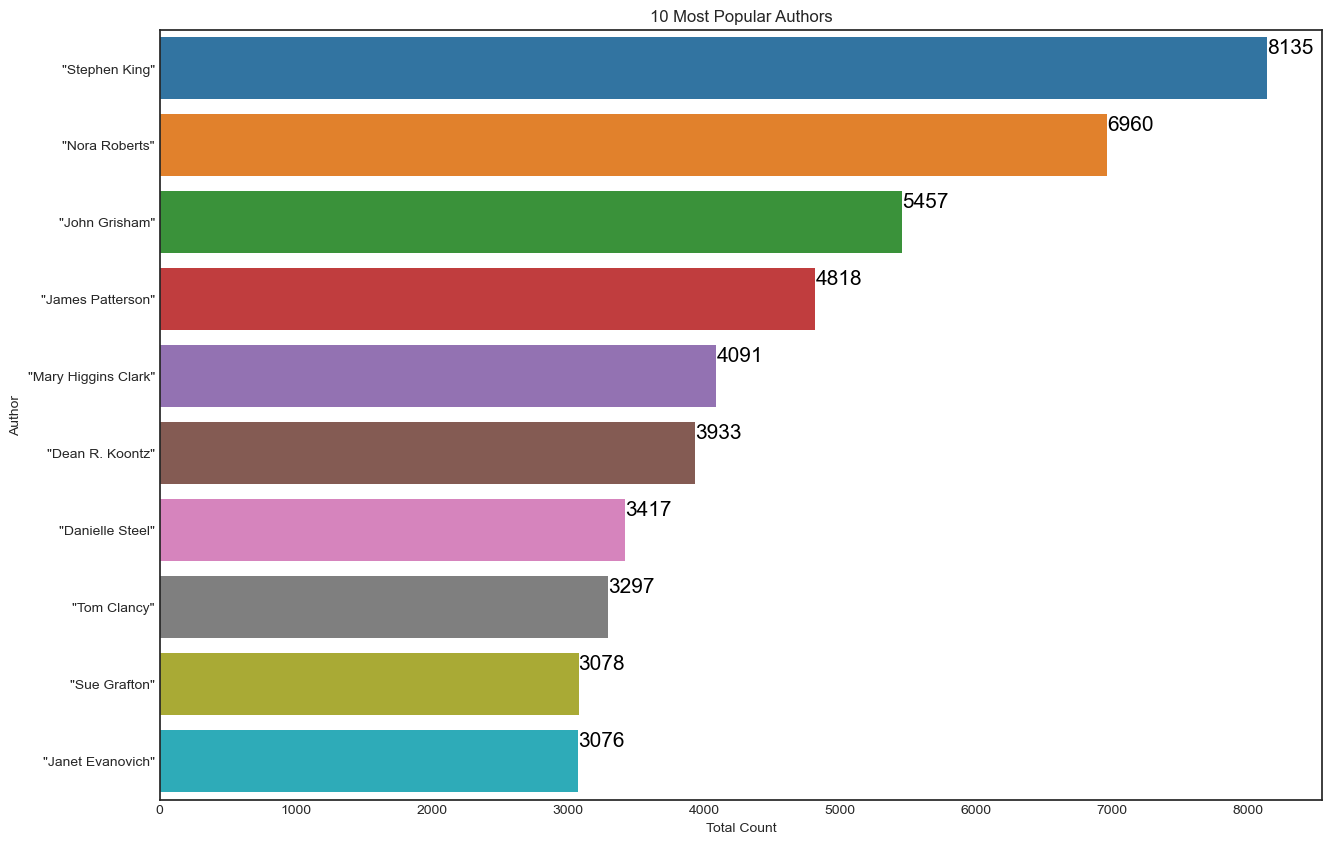

In [37]:
#Building a bar chart displaying the 10 most popular authors
plt.style.use('seaborn-white')
plt.figure(figsize=(15, 10))
graph= sns.barplot(x= Pop_author['Title'], y=Pop_author["Author"], data=Pop_author)
graph.set(title='10 Most Popular Authors')
graph.set_xlabel("Total Count")

#This took forever to figure out how to do...
totals = []
for i in graph.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in graph.patches:
    graph.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [48]:
distro_ratings= BX.groupby('Title')['Rating'].agg(['mean', 'count']).sort_values(by='count',ascending=False).reset_index()
distro_ratings= distro_ratings.loc[distro_ratings['count'] > 100]
distro_ratings['mean']= distro_ratings['mean'].astype(float)
distro_ratings.head(10)

,Title,mean,count
0,"""Wild Animus""",1.033156,2262
1,"""The Lovely Bones: A Novel""",4.457045,1164
2,"""The Da Vinci Code""",4.669492,826
3,"""A Painted House""",3.199739,766
4,"""The Nanny Diaries: A Novel""",3.459816,759
5,"""Bridget Jones's Diary""",3.518919,740
6,"""The Secret Life of Bees""",4.558239,704
7,"""Divine Secrets of the Ya-Ya Sisterhood: A Novel""",3.455904,669
8,"""The Red Tent (Bestselling Backlist)""",4.320840,667
9,"""Angels &amp",3.743711,636


/var/folders/xn/zxr8x63d7dl9t22nbdnj_b2c0000gn/T/ipykernel_76421/2712004393.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph= sns.distplot(distro_ratings['mean'])


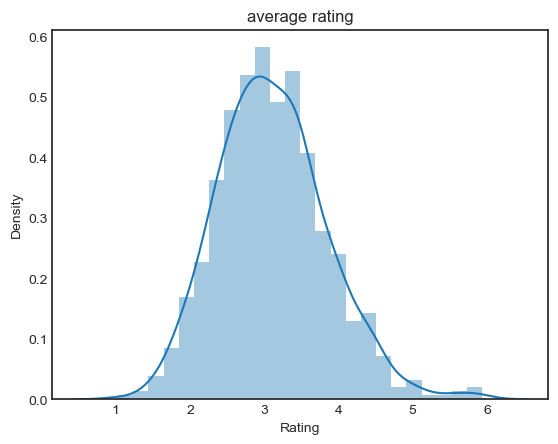

In [46]:
#Plotting a histogram of average ratings
graph= sns.distplot(distro_ratings['mean'])
graph.set(title='average rating')
graph.set_xlabel('Rating')
plt.show()
